**Decision Trees**

Some of the code is adapted from:
https://github.com/ageron/handson-ml2

# Training and Visualizing a Decision Tree on Two Variables of the iris dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#Loading the data
iris = load_iris(as_frame=True)
columns_to_use = ["petal length (cm)", "petal width (cm)"]
X_iris = iris.data[columns_to_use].values
y_iris = iris.target

*Split it into a training set and a test set using train_test_split()*

In [ ]:
#Take 40% of the data as testing and the remaining 60% as training
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.4, random_state=42)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print("Training Data", X_train.shape)
print("Testing Data", X_test.shape)  #60 points for testing

Training Data (90, 2)
Testing Data (60, 2)


**Decision tree trained on X_train**

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
# Accuracy on the training dataset using the score method
print("Training Accuracy:", tree_clf.score(X_train, y_train))

Training Accuracy: 0.9888888888888889


**Making Prediction**

In [ ]:
y_pred = tree_clf.predict(X_test)
print("Predicted Labels:", y_pred)  #Predicted labels the testing points
print("True Labels:     ", y_test) #True labels
print("Training Accuracy:", metrics.accuracy_score(tree_clf.predict(X_train), y_train))
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))  #1 mistake .. 59/60 = 0.983

Predicted Labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1]
True Labels:      [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1]
Testing Accuracy: 0.9833333333333333


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)  # 1 wrong prediction is made .. Accuracy 

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 17]], dtype=int64)

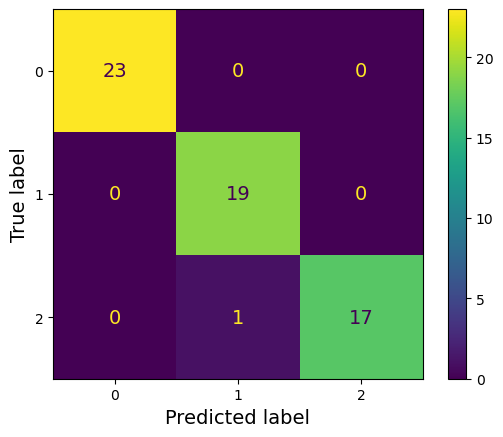

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)  # 1 wrong prediction is made .. Accuracy 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()
plt.show()

**Different training sets result in different models**

In [ ]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.4)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

Testing Accuracy: 0.9333333333333333
Testing Accuracy: 0.95
Testing Accuracy: 0.9666666666666667
Testing Accuracy: 0.9333333333333333
Testing Accuracy: 0.95
Testing Accuracy: 0.9333333333333333
Testing Accuracy: 0.9166666666666666
Testing Accuracy: 0.9333333333333333
Testing Accuracy: 0.9
Testing Accuracy: 0.95


**Different training sets result in different models**
### Another way to split the data

In [ ]:
#You can use the ShuffleSplit to split the data into k different splits
from sklearn.model_selection import ShuffleSplit

n_instances = 90  #number of records in each small training dataset
rs = ShuffleSplit(n_splits=10, test_size=len(X_iris) - n_instances, random_state=42)

for mini_train_index, mini_test_index in rs.split(X_iris):
    X_train = X_iris[mini_train_index,:]
    y_train = y_iris[mini_train_index]
    X_test  = X_iris[mini_test_index,:]
    y_test = y_iris[mini_test_index]
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

Testing Accuracy: 0.9833333333333333
Testing Accuracy: 0.9833333333333333
Testing Accuracy: 0.9166666666666666
Testing Accuracy: 0.95
Testing Accuracy: 0.95
Testing Accuracy: 0.9666666666666667
Testing Accuracy: 0.9333333333333333
Testing Accuracy: 0.95
Testing Accuracy: 0.9833333333333333
Testing Accuracy: 0.9


## Cross Validation
**Every single point is used for testing once**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_clf, X_iris, y_iris, cv=5)
print(scores)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.96666667 0.96666667 0.9        0.96666667 1.        ]
0.96 accuracy with a standard deviation of 0.03


In [ ]:
#50 cross validation. Each time, train on 147 and test on 3 samples
scores = cross_val_score(tree_clf, X_iris, y_iris, cv=50)
print(scores.round(2))

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[1.   1.   1.   1.   1.   1.   0.67 1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   0.67 0.67 1.   1.   1.   1.   1.   0.67 0.67
 1.   0.67 1.   1.   1.   0.67 1.   1.   1.   1.   0.67 1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.  ]
0.95 accuracy with a standard deviation of 0.12


## Leave One Out
**Implementation**

In [ ]:
indices = list(range(X_iris.shape[0]))
print(indices)

scores = []
for i in range(X_iris.shape[0]):  # X_iris.shape[0] = 150
    train_index = indices[0:i] + indices[i+1:]
    test_index = [i]
    X_train, X_test = X_iris[train_index], X_iris[test_index]
    y_train, y_test = y_iris[train_index], y_iris[test_index]
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Fold ", i, " Testing Accuracy:", acc)
    scores.append(acc)
    

print("%0.2f accuracy with a standard deviation of %0.2f" % (np.mean(scores), np.std(scores)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
Fold  0  Testing Accuracy: 1.0
Fold  1  Testing Accuracy: 1.0
Fold  2  Testing Accuracy: 1.0
Fold  3  Testing Accuracy: 1.0
Fold  4  Testing Accuracy: 1.0
Fold  5  Testing Accuracy: 1.0
Fold  6  Testing Accuracy: 1.0
Fold  7  Testing Accuracy: 1.0
Fold  8  Testing Accuracy: 1.0
Fold  9  Testing Accuracy: 1.0
Fold  10  Testing Accuracy: 1.0
Fold  11  Testing

###  Implementation using LeaveOneOut from sklearn

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut() 

scores = []

for i, (train_index, test_index) in enumerate(loo.split(X_iris)):  # X_iris.shape[0] = 150
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_iris[train_index], X_iris[test_index]
    y_train, y_test = y_iris[train_index], y_iris[test_index]
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Fold ", i, " Testing Accuracy:", acc)
    scores.append(acc)
    

#print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("%0.2f accuracy with a standard deviation of %0.2f" % (np.mean(scores), np.std(scores)))

Fold  0  Testing Accuracy: 1.0
Fold  1  Testing Accuracy: 1.0
Fold  2  Testing Accuracy: 1.0
Fold  3  Testing Accuracy: 1.0
Fold  4  Testing Accuracy: 1.0
Fold  5  Testing Accuracy: 1.0
Fold  6  Testing Accuracy: 1.0
Fold  7  Testing Accuracy: 1.0
Fold  8  Testing Accuracy: 1.0
Fold  9  Testing Accuracy: 1.0
Fold  10  Testing Accuracy: 1.0
Fold  11  Testing Accuracy: 1.0
Fold  12  Testing Accuracy: 1.0
Fold  13  Testing Accuracy: 1.0
Fold  14  Testing Accuracy: 1.0
Fold  15  Testing Accuracy: 1.0
Fold  16  Testing Accuracy: 1.0
Fold  17  Testing Accuracy: 1.0
Fold  18  Testing Accuracy: 1.0
Fold  19  Testing Accuracy: 1.0
Fold  20  Testing Accuracy: 1.0
Fold  21  Testing Accuracy: 1.0
Fold  22  Testing Accuracy: 1.0
Fold  23  Testing Accuracy: 1.0
Fold  24  Testing Accuracy: 1.0
Fold  25  Testing Accuracy: 1.0
Fold  26  Testing Accuracy: 1.0
Fold  27  Testing Accuracy: 1.0
Fold  28  Testing Accuracy: 1.0
Fold  29  Testing Accuracy: 1.0
Fold  30  Testing Accuracy: 1.0
Fold  31  Testing 

### Overfitting

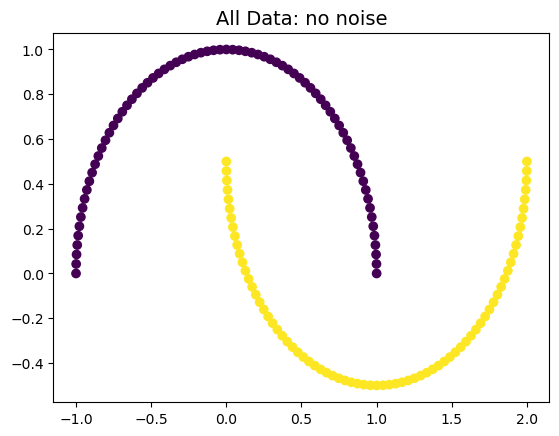

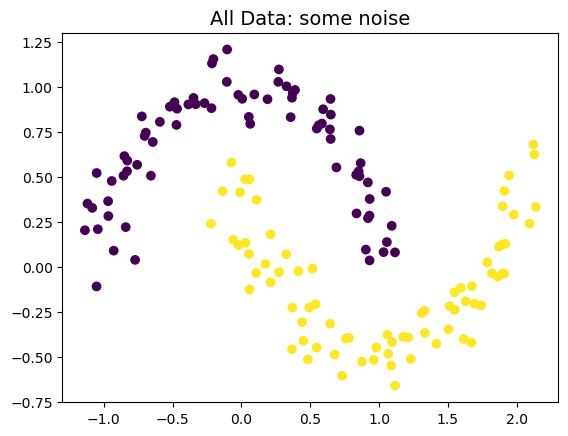

In [ ]:
#Generate data with no noise
X_moons, y_moons = make_moons(n_samples=150, noise=0.0, random_state=42)
plt.scatter(X_moons[:,0], X_moons[:,1],c=y_moons)
plt.title("All Data: no noise")
plt.show()

#Generate data with some noise
X_moons, y_moons = make_moons(n_samples=150, noise=0.1, random_state=42)
plt.scatter(X_moons[:,0], X_moons[:,1],c=y_moons)
plt.title("All Data: some noise")
plt.show()

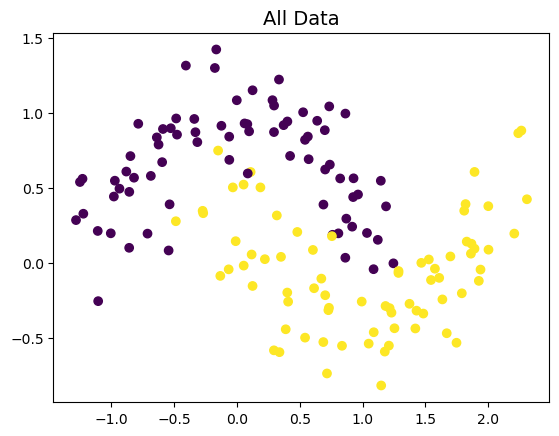

In [ ]:
#Generate data with more noise
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)
plt.scatter(X_moons[:,0], X_moons[:,1],c=y_moons)
plt.title("All Data")
plt.show()

In [ ]:
X_moons_train = X_moons  
y_moons_train = y_moons


tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
tree_clf1.fit(X_moons_train, y_moons_train)
tree_clf2.fit(X_moons_train, y_moons_train)

DecisionTreeClassifier(min_samples_leaf=3, random_state=42)

In [ ]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)
print(tree_clf1.score(X_moons_test, y_moons_test))

print(tree_clf2.score(X_moons_test, y_moons_test))

0.898
0.902


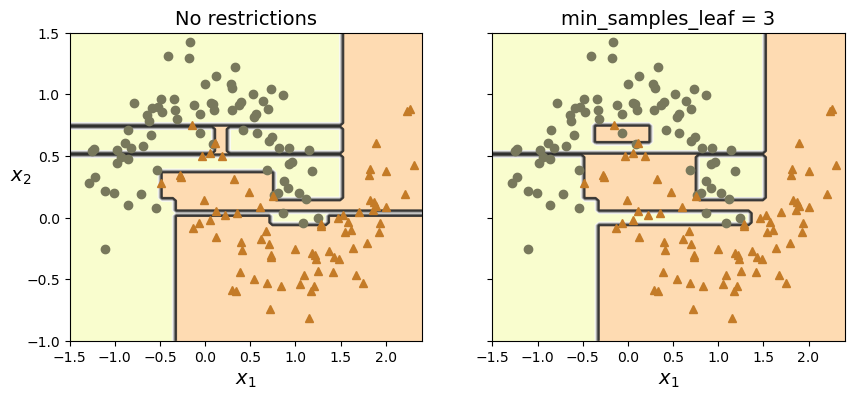

In [ ]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

### Having more data helps


In [ ]:
X_test, y_test = make_moons(n_samples=1000, noise=0.2, random_state=43)

for nn in range(20,200,20):
    print("Number of data points:",nn)
    X_train, y_train = make_moons(n_samples=nn, noise=0.2, random_state=42)
    tree_clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
    tree_clf.fit(X_train, y_train)
    print("Accuracy:",tree_clf.score(X_test, y_test))

Number of data points: 20
Accuracy: 0.83
Number of data points: 40
Accuracy: 0.876
Number of data points: 60
Accuracy: 0.837
Number of data points: 80
Accuracy: 0.856
Number of data points: 100
Accuracy: 0.954
Number of data points: 120
Accuracy: 0.952
Number of data points: 140
Accuracy: 0.95
Number of data points: 160
Accuracy: 0.931
Number of data points: 180
Accuracy: 0.947


### Underfitting 
#### Training a tree of one level: one question only
#### Having more training data doesnot help if we restrict the model

In [ ]:
#Generate data raning from 1000 to 5000. Split into training and testing.
#Build a decision tree of one node only
for i in range(1,6):
    X_moons_train, y_moons_train = make_moons(n_samples=1000*i, noise=0.3, random_state=42)
    X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(X_moons, y_moons, test_size=0.5)
    tree_clf = DecisionTreeClassifier(max_depth=1,random_state=42) 
    tree_clf.fit(X_moons_train, y_moons_train)
    print("Training Dataset", 1000*i/2, print("Testing Dataset", 1000*i/2))
    print("Training Accuracy", tree_clf.score(X_moons_train, y_moons_train))
    print("Testing Accuracy", tree_clf.score(X_moons_test, y_moons_test))


Testing Dataset 500.0
Training Dataset 500.0 None
Training Accuracy 0.8133333333333334
Testing Accuracy 0.7866666666666666
Testing Dataset 1000.0
Training Dataset 1000.0 None
Training Accuracy 0.8266666666666667
Testing Accuracy 0.84
Testing Dataset 1500.0
Training Dataset 1500.0 None
Training Accuracy 0.8266666666666667
Testing Accuracy 0.8
Testing Dataset 2000.0
Training Dataset 2000.0 None
Training Accuracy 0.8133333333333334
Testing Accuracy 0.8
Testing Dataset 2500.0
Training Dataset 2500.0 None
Training Accuracy 0.8666666666666667
Testing Accuracy 0.8


##  Grid search with cross-validation to find good hyperparameter values
### We can try different decision tree models with different parameters using the GridSearchCV from sklearn
### It chooses the parameters that give the best performance

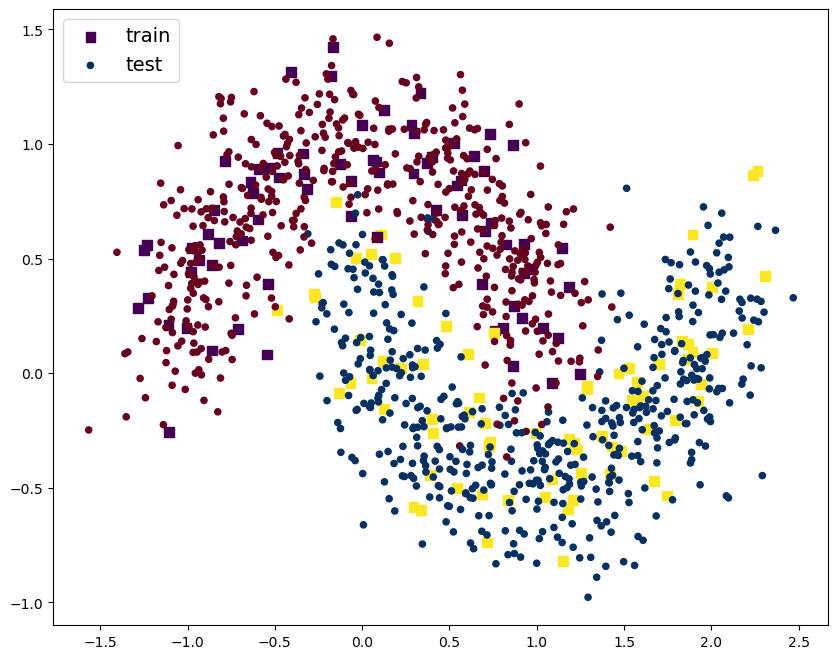

In [ ]:
X_train, y_train = make_moons(n_samples=150, noise=0.2, random_state=42)
X_test, y_test = make_moons(n_samples=1000, noise=0.2, random_state=43)
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
ax1.scatter(X_train[:,0], X_train[:,1], s=50, c=y_train, marker="s", label='train')
ax1.scatter(X_test[:,0], X_test[:,1], s=20, c=y_test, cmap = "RdBu", marker="o", label='test')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#First try the default parameters for decision tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
print("Accuracy:",tree_clf.score(X_test, y_test))

Accuracy: 0.898


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
params = {
    'max_leaf_nodes': list(range(2, 50)),
    'max_depth': list(range(2, 8)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.922

In [ ]:
tree_clf = grid_search_cv.best_estimator_
print(tree_clf.criterion) #'gini', 'entropy'
print(tree_clf.max_leaf_nodes)
print(tree_clf.max_depth)
print(tree_clf.min_samples_split)

gini
8
6
2


## Ensemble Methods

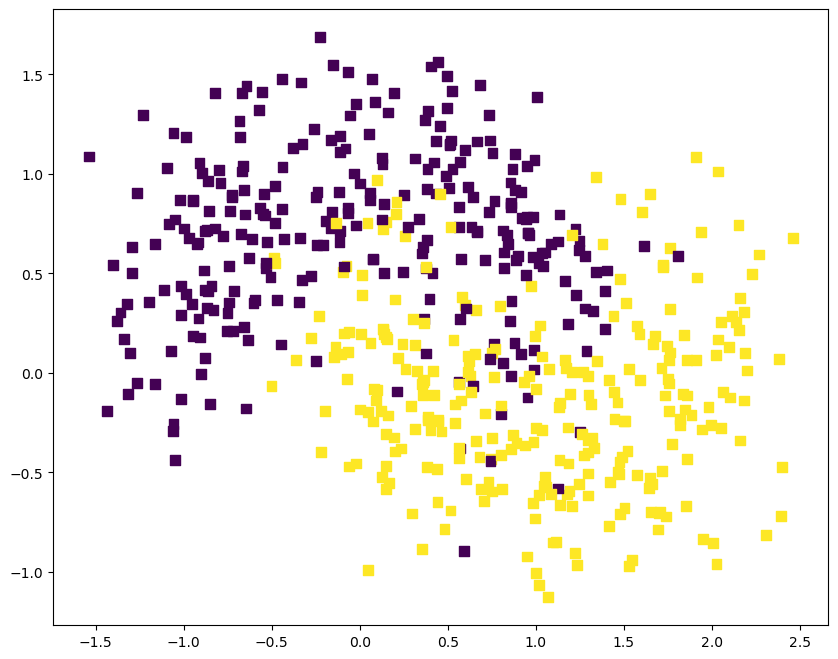

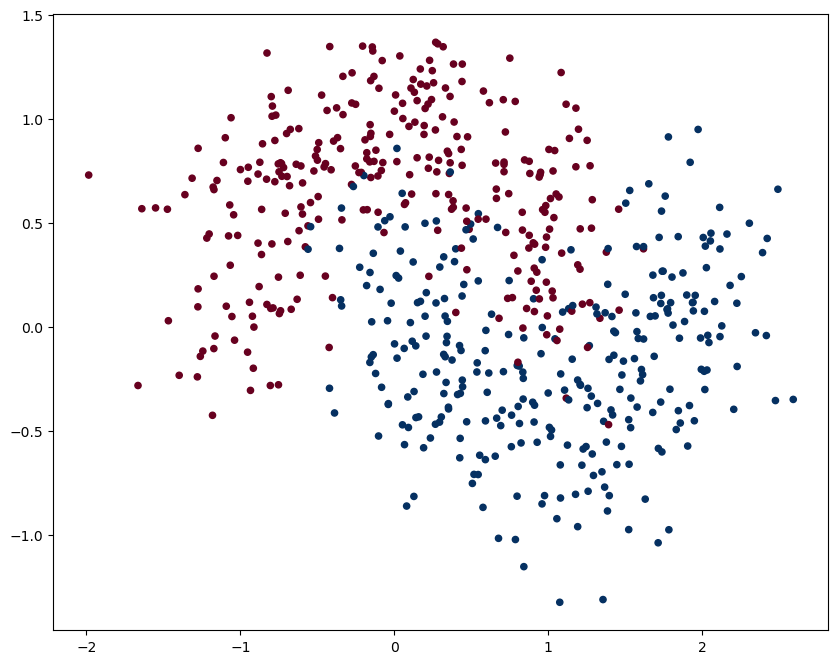

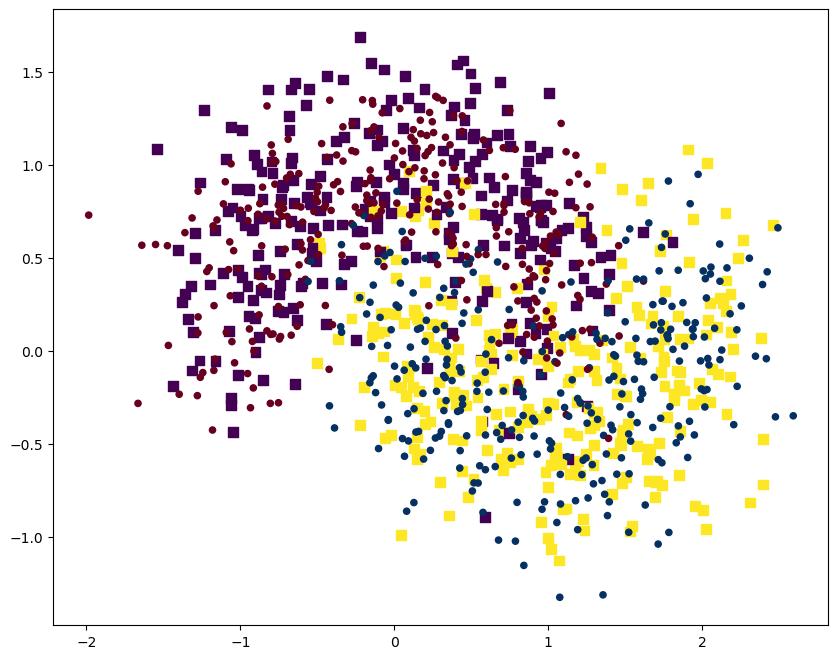

In [ ]:
#Generate Data
X_train, y_train = make_moons(n_samples=550, noise=0.3, random_state=42)
X_test, y_test = make_moons(n_samples=600, noise=0.3, random_state=43)

#Plot Data
plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0], X_train[:,1], s=50, c=y_train, marker="s")
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(X_test[:,0], X_test[:,1], s=20, c=y_test, cmap = "RdBu", marker="o")
plt.show()

#Plot Data
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
ax1.scatter(X_train[:,0], X_train[:,1], s=50, c=y_train, marker="s")
ax1.scatter(X_test[:,0], X_test[:,1], s=20, c=y_test, cmap = "RdBu", marker="o")
plt.show()

### One Single Tree

In [ ]:
#One Single Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
print("Accuracy:",tree_clf.score(X_test, y_test))

Accuracy: 0.8716666666666667


### Random Forest

In [ ]:
randomForest_clf = RandomForestClassifier(n_estimators=100, random_state=42,max_samples=480)
randomForest_clf.fit(X_train, y_train)
print("Accuracy:",randomForest_clf.score(X_test, y_test))

Accuracy: 0.9166666666666666
